# EMNIST Image Generation GAN

Name: Rejey Ezekiel<br/><br/>
Admin Number: P2348935<br/><br/>

Name: Ng Qing Yang<br/><br/>
Admin Number: ______<br/><br/>

Class: DAAA/FT/2A/01<br/><br/>
Module Code: ST1504 Deep Learning<br/>

<hr>

<h3>References (In Harvard format):</h3>
<ol>

</ol>


# Initialising Libraries and Variables

In [22]:
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Reshape, Conv2DTranspose
from keras.layers import Concatenate
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU
import numpy as np
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, Reshape,BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten, Conv2DTranspose
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from scipy.ndimage import rotate, shift

In [23]:
# List physical GPUs and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading Datasets


In [24]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99038,-1,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.

-   The First columns is the Labels since they are alphabetical there should only be 26 but in this case the count is from -1 to 26 (min - max), therefore there is a extra class which i will be labeling ?.

- There are 784 Columns in the dataset that makes up the Image.

In [26]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,...,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000
mean,12.018084,13.182553,13.182553,13.182553,13.182563,13.186127,13.197577,13.204645,13.201817,13.197920,...,13.182553,13.182553,13.182553,13.185279,13.182876,13.182553,13.182553,13.182553,13.182553,13.182553
std,8.367573,45.515594,45.515594,45.515594,45.515592,45.517474,45.534832,45.545344,45.542036,45.536994,...,45.515594,45.515594,45.515594,45.521483,45.515614,45.515594,45.515594,45.515594,45.515594,45.515594
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [20]:
df[0].unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5, -1,
        3, 25,  2,  8,  4, 20,  9,  6, 12,  1], dtype=int64)

-   The Classes are almsot equal but the -1 class has 10240k images whereas classes 1-26 have roughly 3.4k with a little discrepancies.

In [15]:
import plotly.graph_objects as go

# Count the occurrences of each unique value in the df[0] column
value_counts = df[0].value_counts()
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values)])
fig.update_layout(title='Number of Images in each Class',
                  xaxis_title='Unique Values',
                  yaxis_title='Count',
                  template='plotly_dark',
                  title_x=0.5)  
fig.update_xaxes(tickmode='array', tickvals=value_counts.index)
fig.show()

In [28]:
df[0].value_counts()

0
-1     10240
 25     3453
 11     3438
 5      3437
 24     3437
 20     3436
 17     3435
 16     3430
 9      3428
 26     3427
 8      3424
 23     3423
 22     3422
 21     3419
 18     3419
 3      3419
 12     3415
 15     3408
 10     3402
 13     3402
 4      3398
 2      3396
 1      3396
 6      3394
 19     3392
 7      3385
 14     3365
Name: count, dtype: int64

# Viewing the Images
-   We can see that the images Oreintation is wrong in the case belo we can see that G and H is not in the correct orientation and if left like this the GAN generation will also produce results like this, thus in Preprocessing will need to be done.

-   We can see that the images values range from 0 to 255.

In [49]:
print(df.iloc[0,1:].min())
print(df.iloc[0,1:].max())

0
255


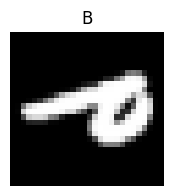

In [50]:
# plotting a random image from the dataset
plt.figure(figsize=(2,2))
idx = np.random.randint(0,len(df))
img = np.array(df.iloc[idx, 1:]).reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(chr(df[0][idx] + 64))
plt.show()

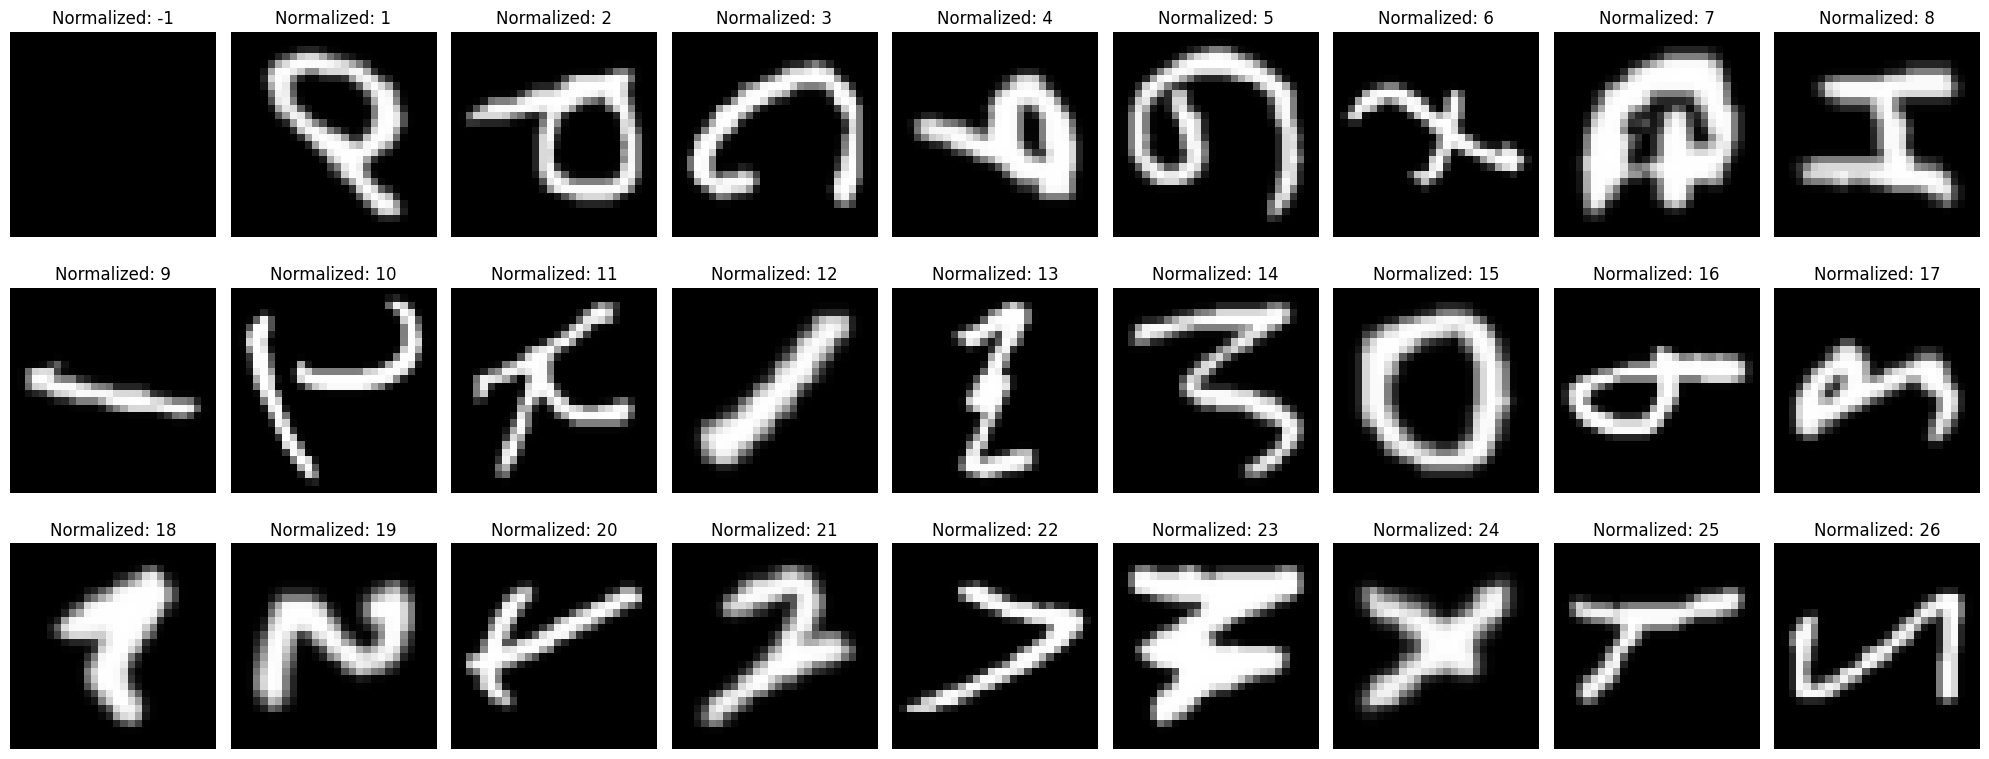

In [51]:
# Get unique labels (assuming you want the first 26 unique labels)
labels = df.iloc[:, 0].unique()
labels = np.sort(labels)

# Create the plot with sufficient subplots
fig, axes = plt.subplots(3, 9, figsize=(20, 8))  # Adjusted to 3 rows and 9 columns for demonstration
axes = axes.flatten()

for label, ax in zip(labels, axes):
    # Select the first row for each unique label
    image_data = df[df.iloc[:, 0] == label].iloc[0, 1:].values
    
    # Ensure the data is in numeric format
    image_data = np.array(image_data, dtype=np.float32)
    
    # Reshape the flat array into a 28x28 image
    image = image_data.reshape(28, 28)
    
    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Normalized: {label}')
    ax.axis('off')

# Hide any remaining empty subplots (if any)
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Image Averageing

-   Image Averaging involves stacking multiple photos on top of each other and averaging them together. The main purpose is to see the noise of the image adn therefore reducing it.


In [59]:
label = df[100]  # or specify the index if you are working with a specific row, e.g., df.iloc[0, 0]

# Compute the average image
average_image = np.mean(df.iloc[100, 1:].values, axis=0)
average_image = average_image.reshape(28, 28)

# Plot the average image with the label in the title
plt.imshow(average_image, cmap='gray')
plt.axis('off')
plt.title(f'Average Image: {label}')
plt.show()

ValueError: cannot reshape array of size 1 into shape (28,28)